# The Breakdown of Trust


## Prisoner's dilemma 

The prisoner's dilemma payoff matrix is
$$P = \begin{array}{c|c|c} C & D & \\ \hline a & b & C\\ \hline c & d & D \end{array}$$
Con $c>a$, $d>b$. En este caso la decisión que maximiza la ganancia localmente es $D$ **independientemente de la acción del otro agente**

Fijamos:
$$P_0 = \begin{array}{c|c|c} C & D & \\ \hline 1 & 0 & C\\ \hline 1.1 & 0.1 & D \end{array}$$


## Prisoner's dilemma + justicia
Si la justicia es un valor entonces hacer lo mismo que el otro tiene un valor extra. Esto es un valor aditivo en la diagonal:
$$P_J = \begin{array}{c|c|c} C & D & \\ \hline 1 + j & 0 & C\\ \hline 1.1 & 0.1 + j & D \end{array}$$

Si $j>0.1$ la acción que maximiza la esperanza de la ganancia depende de la probabilidad de la acción del otro agente.
Si bien las decisiones se toman en base a la matriz $P_J$ la ganancia real es la de la matriz $P_0$.

## Conveniently Upset
ParanoidEconomicus cambia su creencia sobre los otros para maximizar la esperanza de su ganancia real (la de $P_0$). ParanoidEconomicus tiene una cantidad fija de probablidad que puede manipular por lo tanto su creencia va a cambiar mucho si la distribución de probabilidad de las acciones del otro agente es más dispersa(la ambigûedad sobre otros favorece la disonancia cognitiva). 

Con $j=0.3$ Tenemos:
$$P_J = \begin{array}{c|c|c} C & D & \\ \hline 1.3 & 0 & C\\ \hline 1.1 & 0.4 & D \end{array}$$


Si llamamos $\vec p=(p_C, p_D)$ a las probabilidades de $C$ y $D$ respectivamente el punto de infexión $p_C^*$ es el que cumple:
$$
1.3p_C^* = 1.1p_C^* + 0.4p_D^*
$$
$$
0.2p_C^* = 0.4p_D^*
$$

Como $p_D^*=1-p_C^*$

$$
0.2p_C^* = 0.4(1-p_C^*)
$$

$$
0.6p_C^* = 0.4
$$
$$
p_C^* = \frac{2}{3}
$$

o equivalentemente:

$$
p_D^* = \frac{1}{3}
$$

## Probability Matching

La estrategia óptima es tomar la decisión que maximiza la recompenza esperada. Otra estrategia, subóptima pero que es una euristica común y que es estocastica es probablity matching. Esta euristica consiste en tomar la decisión que maximiza el reward con la misma probabilidad que espero que sea la decisión correcta. En este ejemplo se reduce a imitar lo mejor posible a mi compañero. 

## Flow

![flow](figures/strategy_flow.png)

## TODO
* ~~Implementar Event Dispacher model~~
* ~~programar test automáticos~~
* ~~hacer que el prior sea una beta~~
* ~~Usar multiprocessing~~
* ~~darle memoria a los agentes~~


## Load modules

In [1]:
%matplotlib inline

from __future__ import division
from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from society.agents import ParanoidEconomicus

from society.worlds import RandomWorld
from society.functions import paranoia_eq_prior
import pandas as pd
from IPython.display import display 
import networkx as nx
import seaborn as sns
from matplotlib.font_manager import FontProperties

sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
linewidthin = 3.68153

## Ambiguity about others’ social preferences increase the likelihood that a person will be selfish

IndexError: list assignment index out of range

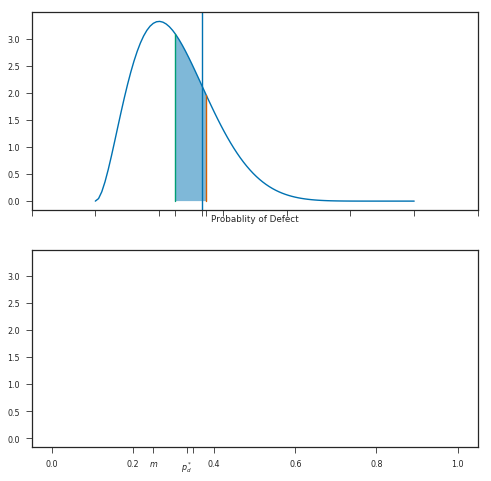

In [4]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
fig, ((ax1, ax2)) = plt.subplots(2,1, sharex=True, sharey=True, figsize=[8, 8])
w = RandomWorld(payoff.values)

prior1 = (9, 3)
w.add_agents(ParanoidEconomicus, 2, prior_params=prior1, paranoia=0.25, justice=justice)
w.agents[0].plot_prior(w.agents[1], ax=ax1)
ax1.legend()

prior3 = (18, 6)
w.add_agents(ParanoidEconomicus, 2, prior_params=prior3, paranoia=0.25, justice=justice)
w.agents[2].plot_prior(w.agents[3], ax=ax2)
ax2.legend()            
ax1.set_xticks(np.arange(0, 1, 0.2))
plt.show()



# Initial Corrupted State

(u'manipulated mean', 0.4166666666666667)
(u'paranoia', 0.0)
(u'paranoia', 0.21428410101567563)
(u'paranoia', 0.3569521183030777)
(u'paranoia', 0.40711053400637687)


/home/andres/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


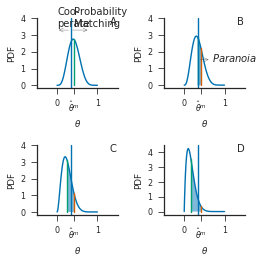

In [5]:
font = FontProperties()
font.set_family('Times New Roman')
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
prior1 = (7, 5)
mtheta = 5./12
print('manipulated mean', mtheta)
fig, (axs) = plt.subplots(2,2, sharex=False, sharey=False, figsize=[linewidthin, linewidthin])
w = RandomWorld(payoff.values)
for i, (prior, ax, l) in enumerate(zip([(7, 5), (8, 4), (9, 3), (10, 2)], axs.flatten(), ['A', 'B', 'C', 'D'])):
    w.add_agents(ParanoidEconomicus, 2, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1), justice=justice)
    w.agents[2*i].plot_prior(w.agents[i*2+1], ax=ax)
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_ylabel('PDF')
    ax.set_xlabel(r'$\theta$')
    print('paranoia', paranoia_eq_prior(prior, prior1))
    ax.set_yticks([0, 1, 2, 3, 4])
    ax.set_xticks([0, mtheta, 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    #ax.set_xticks([0, 0.2,mtheta,0.6,0.8, 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6,0.8, 1])

    if i==0:
        font.set_family('Times New Roman')
        ax.annotate('Coo-\nperate', xy=(0.01, 3.5), fontproperties=font)
        ax.annotate('', xy=(1./3, 3.3), xytext=(0, 3.3),
                    arrowprops=dict(arrowstyle="<-"),)
        font.set_family('Times New Roman')
        ax.annotate('Probability\nMatching', xy=(0.42, 3.5), fontproperties=font)
        ax.annotate('', xy=(1./3, 3.3), xytext=(0.8, 3.3),
                    arrowprops=dict(arrowstyle="<-"),)
    if i==1:
        ax.annotate('$Paranoia$', xy=(0.35, 1.5), xytext=(0.7, 1.37),
                    arrowprops=dict(arrowstyle="<-"),)

        
sns.despine()
plt.tight_layout()
plt.savefig('figures/belief_avoiding_trust_square.pdf')
plt.show()

(u'manipulated mean', 0.4166666666666667)
(u'paranoia', 0.0)
(u'paranoia', 0.21428410101567563)
(u'paranoia', 0.3569521183030777)
(u'paranoia', 0.40711053400637687)


/home/andres/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


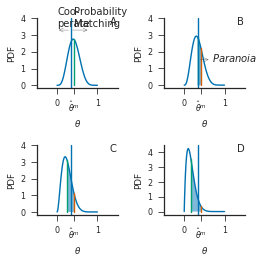

In [2]:
font = FontProperties()
font.set_family('Times New Roman')
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
prior1 = (7, 5)
mtheta = 5./12
print('manipulated mean', mtheta)
fig, (axs) = plt.subplots(2,2, sharex=False, sharey=False, figsize=[linewidthin, linewidthin])
w = RandomWorld(payoff.values)
for i, (prior, ax, l) in enumerate(zip([(7, 5), (8, 4), (9, 3), (10, 2)], axs.flatten(), ['A', 'B', 'C', 'D'])):
    w.add_agents(ParanoidEconomicus, 2, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1), justice=justice)
    w.agents[2*i].plot_prior(w.agents[i*2+1], ax=ax)
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_ylabel('PDF')
    ax.set_xlabel(r'$\theta$')
    print('paranoia', paranoia_eq_prior(prior, prior1))
    ax.set_yticks([0, 1, 2, 3, 4])
    ax.set_xticks([0, mtheta, 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    #ax.set_xticks([0, 0.2,mtheta,0.6,0.8, 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6,0.8, 1])

    if i==0:
        font.set_family('Times New Roman')
        ax.annotate('Coo-\nperate', xy=(0.01, 3.5), fontproperties=font)
        ax.annotate('', xy=(1./3, 3.3), xytext=(0, 3.3),
                    arrowprops=dict(arrowstyle="<-"),)
        font.set_family('Times New Roman')
        ax.annotate('Probability\nMatching', xy=(0.42, 3.5), fontproperties=font)
        ax.annotate('', xy=(1./3, 3.3), xytext=(0.8, 3.3),
                    arrowprops=dict(arrowstyle="<-"),)
    if i==1:
        ax.annotate('$Paranoia$', xy=(0.35, 1.5), xytext=(0.7, 1.37),
                    arrowprops=dict(arrowstyle="<-"),)

        
sns.despine()
plt.tight_layout()
plt.savefig('figures/belief_avoiding_trust_square_tesis.pdf')
plt.show()

# Initial Cooperative State

(0.0, (8, 4))
(0.22109025670449645, (9, 3))
(0.3555349247376467, (10, 2))
(0.37243421061698834, (11, 1))


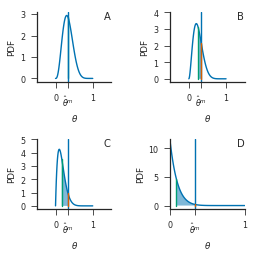

In [6]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
w = RandomWorld(payoff.values)
w.add_agents(ParanoidEconomicus, 1)
prior1 = [8, 4]
mtheta = 4./12
fig, (axs) = plt.subplots(2,2, sharex=False, sharey=False, figsize=[linewidthin, linewidthin])
for i, (priorC, ax, l) in enumerate(zip(range(8, 12), axs.flatten(), ['A', 'B', 'C', 'D'])):
    prior = (priorC, 12 - priorC)
    w.add_agents(ParanoidEconomicus, 1, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1),
                 justice=justice)
    w.agents[i+1].plot_prior(w.agents[0], ax=ax);
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('PDF')
    #ax.set_xticks([0, 0.2, mtheta, 0.6, 0.8 , 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6, 0.8, 1])
    ax.set_xticks([0, mtheta , 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    if i==0:
        ax.set_yticks([0, 1, 2, 3])
    if i==1:
        ax.set_yticks([0, 1, 2, 3, 4])
    if i==2:
        ax.set_yticks([0, 1, 2, 3, 4, 5])

    print(paranoia_eq_prior(prior, prior1), prior)
    #ax.legend();

ax.set_xlim([0, 1]);
#ax.set_xticks(np.arange(0, 1, 0.2));
sns.despine()
plt.tight_layout()
fig.savefig('figures/belief_percolation_square.pdf')

(0.0, (8, 4))
(0.22109025670449645, (9, 3))
(0.3555349247376467, (10, 2))
(0.37243421061698834, (11, 1))


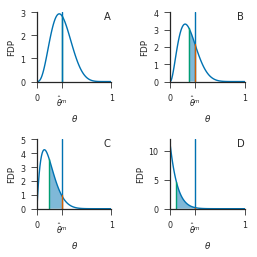

In [6]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
w = RandomWorld(payoff.values)
w.add_agents(ParanoidEconomicus, 1)
prior1 = [8, 4]
mtheta = 4./12
fig, (axs) = plt.subplots(2,2, sharex=False, sharey=False, figsize=[linewidthin, linewidthin])
for i, (priorC, ax, l, ymax) in enumerate(zip(range(8, 12), axs.flatten(), ['A', 'B', 'C', 'D'], [3, 4, 5, 12])):
    prior = (priorC, 12 - priorC)
    w.add_agents(ParanoidEconomicus, 1, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1),
                 justice=justice)
    w.agents[i+1].plot_prior(w.agents[0], ax=ax);
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('FDP')
    #ax.set_xticks([0, 0.2, mtheta, 0.6, 0.8 , 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6, 0.8, 1])
    ax.set_xticks([0, mtheta , 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    if i==0:
        ax.set_yticks([0, 1, 2, 3])
    if i==1:
        ax.set_yticks([0, 1, 2, 3, 4])
    if i==2:
        ax.set_yticks([0, 1, 2, 3, 4, 5])

    print(paranoia_eq_prior(prior, prior1), prior)
    #ax.legend();
    ax.set_xlim([0, 1]);
    ax.set_ylim([0, ymax]);
#ax.set_xticks(np.arange(0, 1, 0.2));
sns.despine()
plt.tight_layout()
fig.savefig('figures/belief_percolation_square_tesis.pdf')

# more cooperative state

(0.0, (9, 3))
(0.23358425288976703, (10, 2))
(0.34176009452877232, (11, 1))


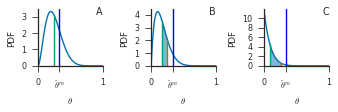

In [4]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
w = RandomWorld(payoff.values)
w.add_agents(ParanoidEconomicus, 1)
prior1 = [9, 3]
mtheta = 4./12
fig, (axs) = plt.subplots(1,3, sharex=False, sharey=False, figsize=[345./72, 0.333*345./72])
for i, (priorC, ax, l) in enumerate(zip(range(9, 12), axs.flatten(), ['A', 'B', 'C'])):
    prior = (priorC, 12 - priorC)
    w.add_agents(ParanoidEconomicus, 1, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1),
                 justice=justice)
    w.agents[i+1].plot_prior(w.agents[0], ax=ax);
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('PDF')
    #ax.set_xticks([0, 0.2, mtheta, 0.6, 0.8 , 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6, 0.8, 1])
    ax.set_xticks([0, mtheta , 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    if i==0:
        ax.set_yticks([0, 1, 2, 3])
    if i==1:
        ax.set_yticks([0, 1, 2, 3, 4])
    if i==2:
        ax.set_yticks([0, 2, 4, 6, 8, 10])

    print(paranoia_eq_prior(prior, prior1), prior)
    #ax.legend();

ax.set_xlim([0, 1]);
#ax.set_xticks(np.arange(0, 1, 0.2));
sns.despine()
plt.tight_layout()
fig.savefig('figures/belief_percolation_robust1.pdf')

(0.0, (10, 2))
(0.24940724481933862, (11, 1))


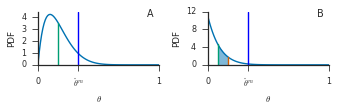

In [7]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
w = RandomWorld(payoff.values)
w.add_agents(ParanoidEconomicus, 1)
prior1 = [10, 2]
mtheta = 4./12
fig, (axs) = plt.subplots(1,2, sharex=False, sharey=False, figsize=[345./72, 0.333*345./72])
for i, (priorC, ax, l) in enumerate(zip(range(10, 12), axs.flatten(), ['A', 'B'])):
    prior = (priorC, 12 - priorC)
    w.add_agents(ParanoidEconomicus, 1, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1),
                 justice=justice)
    w.agents[i+1].plot_prior(w.agents[0], ax=ax);
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('PDF')
    #ax.set_xticks([0, 0.2, mtheta, 0.6, 0.8 , 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6, 0.8, 1])
    ax.set_xticks([0, mtheta , 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    if i==0:
        ax.set_yticks([0, 1, 2, 3, 4])
    if i==1:
        ax.set_yticks([0, 4, 8, 12])
    print(paranoia_eq_prior(prior, prior1), prior)
    #ax.legend();

ax.set_xlim([0, 1]);
#ax.set_xticks(np.arange(0, 1, 0.2));
sns.despine()
plt.tight_layout()
fig.savefig('figures/belief_percolation_robust2.pdf')

(0.0, (11, 1))


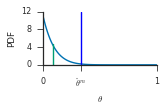

In [13]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
w = RandomWorld(payoff.values)
w.add_agents(ParanoidEconomicus, 1)
prior1 = [11, 1]
mtheta = 4./12
#fig, (axs) = plt.subplots(1,2, sharex=False, sharey=False, figsize=[345./72, 0.333*345./72])
#for i, (priorC, ax, l) in enumerate(zip(range(10, 12), axs.flatten(), ['A', 'B'])):
fig = plt.figure(figsize=[0.5*345./72, 0.333*345./72])
ax = plt.gca()
prior = (priorC, 12 - priorC)
w.add_agents(ParanoidEconomicus, 1, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1),
             justice=justice)
w.agents[1].plot_prior(w.agents[0], ax=ax);
#ax.text(0.9, 0.9, l, transform=ax.transAxes)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('PDF')
#ax.set_xticks([0, 0.2, mtheta, 0.6, 0.8 , 1])
#ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6, 0.8, 1])
ax.set_xticks([0, mtheta , 1])
ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
#if i==0:
#    ax.set_yticks([0, 1, 2, 3, 4])
#if i==1:
ax.set_yticks([0, 4, 8, 12])
print(paranoia_eq_prior(prior, prior1), prior)
#ax.legend();

ax.set_xlim([0, 1]);
#ax.set_xticks(np.arange(0, 1, 0.2));
sns.despine()
plt.tight_layout()
fig.savefig('figures/belief_percolation_robust3.pdf')
#fig.savefig('figures/belief_percolation_robust4.pdf')

# Watts Strogats Model

<IPython.core.display.Javascript object>


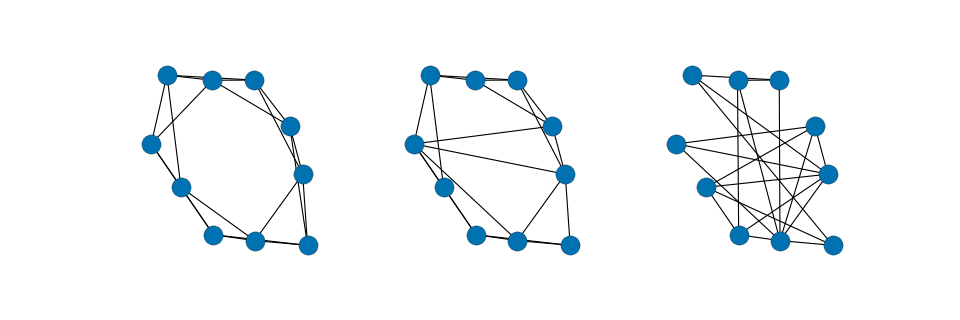

In [16]:
pal = sns.color_palette()
G = nx.watts_strogatz_graph(10, 4, 0)
layout = nx.spring_layout(G)
fig, axs = plt.subplots(1, 3, figsize=[12, 4])
for ax, p in zip(axs, [0, 0.2, 1]):
    G = nx.watts_strogatz_graph(10, 4, p)
    nx.draw(G, pos=layout, ax=ax, node_color=pal[0])
plt.savefig('informe/watts_strogats.pdf')
plt.draw()


In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
def pro(M):
    p = (M[1,0]-M[0,0])/(M[0,1]-M[0,0]+M[1,0]-M[1,1])
    return p
def isprissoner(M):
    return M[1,0]>M[0,0] and M[0,0]>M[1,1] and M[1,1]>M[0,1]
a=0.29
A = np.array([[1 + a, 0, 0 , 0], [0, 1, a, 0], [0, a,1, 0], [0, 0, 0, 1 + a]])
B = np.array([1.3, 0.4, 
              1.1, 0.8])

M = B.reshape((2,2))
S = solve(A, B).reshape((2,2))
print(S)
p = pro(M)
print(p)
print(isprissoner(S))

[[ 1.00775194  0.0884376 ]
 [ 1.0743531   0.62015504]]
0.333333333333
True


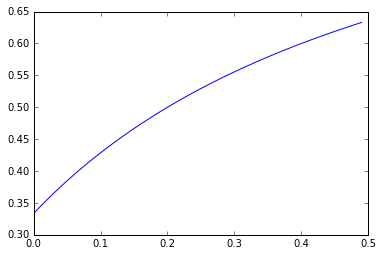

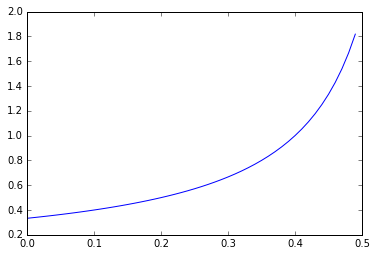

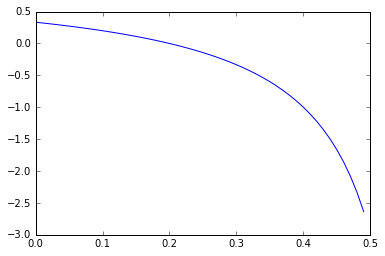

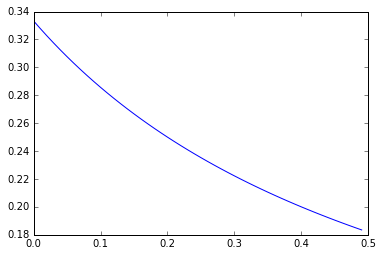

In [45]:
x=np.arange(0, 0.5, 0.01)
Ms = [M + np.array([[xx, 0],[0,0]]) for  xx in x]
y = [pro(MM) for MM in Ms]
plt.figure()
plt.plot(x, y)

plt.figure()
Ms = [M + np.array([[0, xx],[0,0]]) for  xx in x]
y = [pro(MM) for MM in Ms]
plt.plot(x, y)

plt.figure()
Ms = [M + np.array([[0, 0],[xx, 0]]) for  xx in x]
y = [pro(MM) for MM in Ms]
plt.plot(x, y)

plt.figure()
Ms = [M + np.array([[0, 0],[0, xx]]) for  xx in x]
y = [pro(MM) for MM in Ms]
plt.plot(x, y)

['__abs__',
 '__add__',
 '__and__',
 '__class__',
 '__cmp__',
 '__coerce__',
 '__delattr__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__getattribute__',
 '__getnewargs__',
 '__hash__',
 '__hex__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__long__',
 '__lshift__',
 '__mod__',
 '__mul__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__oct__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'imag',
 'numerator',
 'real']

# More memory

(0.0, (10, 4))
(0.21469955876757674, (11, 3))
(0.34875477484037409, (12, 2))
(0.36899288820276965, (13, 1))


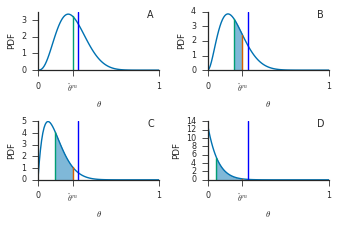

In [8]:
payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3
plt.close('all')
w = RandomWorld(payoff.values)
w.add_agents(ParanoidEconomicus, 1)
prior1 = [10, 4]
mtheta = 4./14
fig, (axs) = plt.subplots(2,2, sharex=False, sharey=False, figsize=[345./72, 0.666*345./72])
for i, (priorC, ax, l) in enumerate(zip(range(10, 14), axs.flatten(), ['A', 'B', 'C', 'D'])):
    prior = (priorC, 14 - priorC)
    w.add_agents(ParanoidEconomicus, 1, prior_params=prior, paranoia=paranoia_eq_prior(prior, prior1),
                 justice=justice)
    w.agents[i+1].plot_prior(w.agents[0], ax=ax);
    ax.text(0.9, 0.9, l, transform=ax.transAxes)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('PDF')
    #ax.set_xticks([0, 0.2, mtheta, 0.6, 0.8 , 1])
    #ax.set_xticklabels([0,0.2, r'$\hat \theta^m$', 0.6, 0.8, 1])
    ax.set_xticks([0, mtheta , 1])
    ax.set_xticklabels([0, r'$\hat \theta^m$', 1])
    if i==0:
        ax.set_yticks([0, 1, 2, 3])
    if i==1:
        ax.set_yticks([0, 1, 2, 3, 4])
    if i==2:
        ax.set_yticks([0, 1, 2, 3, 4, 5])

    print(paranoia_eq_prior(prior, prior1), prior)
    #ax.legend();

ax.set_xlim([0, 1]);
#ax.set_xticks(np.arange(0, 1, 0.2));
sns.despine()
plt.tight_layout()
fig.savefig('figures/belief_percolation_square_memory2.pdf')